# Importing The Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense,Flatten,MaxPooling2D
from tensorflow.keras.layers import Conv2D
from keras.optimizers import Adam
from keras.utils import np_utils
from tensorflow.keras.models import load_model

# Loading the Data

In [2]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [3]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


# Analyzing The Data

In [5]:
X_train[2]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,  67, 232,  39,   0,   0,   0,
          0,   0],
       [  

In [6]:
y_train[2]

4

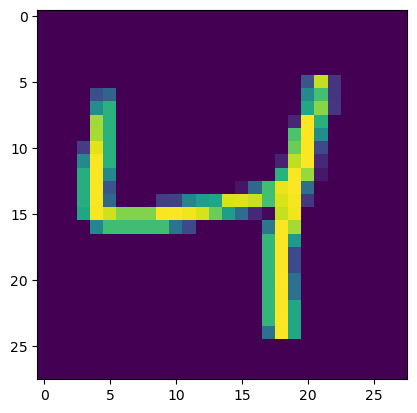

In [7]:
plt.imshow(X_train[2])

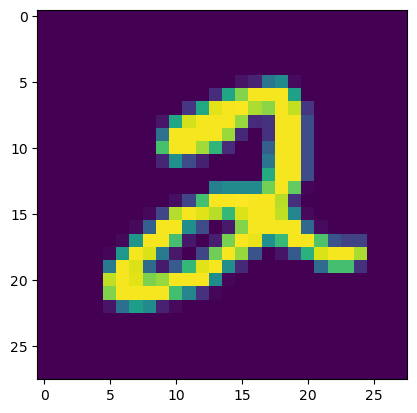

In [8]:
plt.imshow(X_train[5])

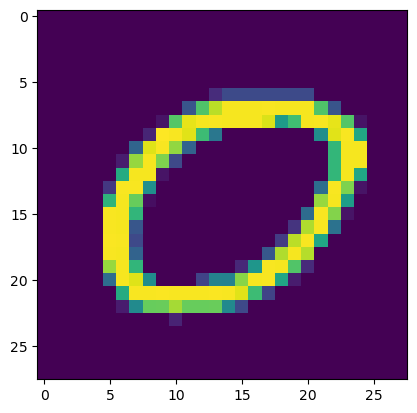

In [9]:
plt.imshow(X_train[156])

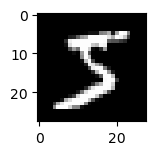

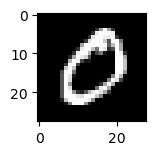

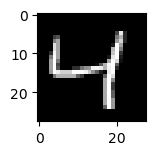

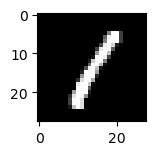

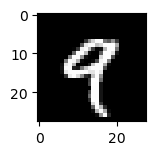

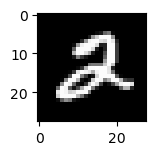

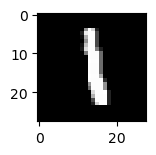

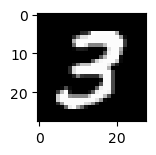

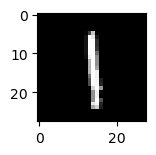

In [26]:
for i in range(9):
    plt.subplot(330 + 1 +i)
    plt.imshow(X_train[i], cmap = plt.get_cmap('gray'))
    plt.show()

# Reshaping The Data

In [27]:
X_train = X_train.reshape(60000,28,28,1).astype('float32')
X_test = X_test.reshape(10000,28,28,1).astype('float32')

In [28]:
X_train

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [29]:
X_test

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

# Applying One Hot Encoding

In [30]:
number_of_classes = 20

In [31]:
y_train = np_utils.to_categorical(y_train,number_of_classes)
y_test = np_utils.to_categorical(y_test,number_of_classes)

In [32]:
y_train[2]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.], dtype=float32)

In [33]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

# Create Model

In [34]:
model = Sequential()

# Add CNN layers

In [35]:
model.add(Conv2D(64,(3,3),input_shape=(28,28,1),activation="relu"))
model.add(Conv2D(32,(3,3),activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(number_of_classes,activation="softmax"))

In [36]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 conv2d_5 (Conv2D)           (None, 24, 24, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 20)                92180     
                                                                 
Total params: 111,284
Trainable params: 111,284
Non-trainable params: 0
________________________________________________

# Compiling the Model

In [37]:
model.compile(loss="categorical_crossentropy",optimizer="Adam",metrics=["accuracy"])

# Train The model

In [38]:
model.fit(X_train,y_train,epochs=20,validation_data=(X_test,y_test),batch_size=32)

Epoch 1/20
1875/1875 [==============================] - 162s 86ms/step - loss: 0.1938 - accuracy: 0.9532 - val_loss: 0.0887 - val_accuracy: 0.9749
Epoch 2/20
1875/1875 [==============================] - 151s 80ms/step - loss: 0.0699 - accuracy: 0.9790 - val_loss: 0.0733 - val_accuracy: 0.9775
Epoch 3/20
1875/1875 [==============================] - 134s 72ms/step - loss: 0.0516 - accuracy: 0.9845 - val_loss: 0.0677 - val_accuracy: 0.9802
Epoch 4/20
1875/1875 [==============================] - 132s 70ms/step - loss: 0.0425 - accuracy: 0.9864 - val_loss: 0.0752 - val_accuracy: 0.9783
Epoch 5/20
1875/1875 [==============================] - 144s 77ms/step - loss: 0.0365 - accuracy: 0.9885 - val_loss: 0.0665 - val_accuracy: 0.9836
Epoch 6/20
1875/1875 [==============================] - 139s 74ms/step - loss: 0.0304 - accuracy: 0.9905 - val_loss: 0.0856 - val_accuracy: 0.9834
Epoch 7/20
1875/1875 [==============================] - 144s 77ms/step - loss: 0.0274 - accuracy: 0.9915 - val_loss: 0

# Observing The Metrics

In [39]:
metrics=model.evaluate(X_test,y_test,verbose=0)
print("Metrics(Test Loss & Test Accuracy):")
print(metrics)

Metrics(Test Loss & Test Accuracy):
[0.1997118443250656, 0.9815999865531921]


# Test The Model

In [40]:
prediction = model.predict(X_test[:4])
print(prediction)

1/1 [==============================] - 1s 698ms/step
[[6.58483934e-29 0.00000000e+00 2.48713563e-32 2.42460829e-22
  0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00
  5.17282316e-35 6.67580074e-26 1.12295004e-30 1.07733249e-33
  8.21981540e-31 1.03143639e-30 7.70958373e-32 1.44103852e-30
  6.50697531e-31 3.15299411e-32 6.19957263e-33 3.85209264e-32]
 [4.73084739e-29 1.90298612e-24 1.00000000e+00 1.05839087e-33
  0.00000000e+00 0.00000000e+00 1.19717536e-17 0.00000000e+00
  3.67094105e-25 0.00000000e+00 5.34045304e-33 5.39193851e-32
  1.27385420e-36 1.88573086e-30 3.75196550e-32 1.35261402e-32
  5.02414734e-34 8.28762676e-33 1.69859310e-30 5.04970241e-34]
 [5.27015996e-28 1.00000000e+00 4.96480119e-26 2.57649674e-29
  1.76906407e-21 9.51556071e-25 4.02173203e-29 3.10506457e-21
  4.23672412e-15 3.51781026e-31 1.88744130e-25 1.72025160e-27
  1.31721992e-24 8.07654777e-26 6.29297455e-26 4.34073975e-29
  1.04620027e-25 5.67645473e-25 2.67016725e-27 4.83931075e-27]
 [1.00000000e+

In [41]:
print(np.argmax(prediction,axis = 1))
print(y_test[:4])

[7 2 1 0]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


# Observing The Metrics

In [42]:
metrics=model.evaluate(X_test,y_test,verbose=1)
print("Metrics(Test Loss & Test Accuracy):")
print(metrics)

313/313 [==============================] - 10s 31ms/step - loss: 0.1997 - accuracy: 0.9816
Metrics(Test Loss & Test Accuracy):
[0.1997118443250656, 0.9815999865531921]


# Test The Model

In [43]:
prediction = model.predict(X_test[1:5])
print(prediction)

1/1 [==============================] - 0s 43ms/step
[[4.73084739e-29 1.90298612e-24 1.00000000e+00 1.05839087e-33
  0.00000000e+00 0.00000000e+00 1.19717536e-17 0.00000000e+00
  3.67094105e-25 0.00000000e+00 5.34045304e-33 5.39193851e-32
  1.27385420e-36 1.88573086e-30 3.75196550e-32 1.35261402e-32
  5.02414734e-34 8.28762676e-33 1.69859310e-30 5.04970241e-34]
 [5.27015996e-28 1.00000000e+00 4.96480119e-26 2.57649674e-29
  1.76906407e-21 9.51556071e-25 4.02173203e-29 3.10506457e-21
  4.23672412e-15 3.51781026e-31 1.88744130e-25 1.72025160e-27
  1.31721992e-24 8.07654777e-26 6.29297455e-26 4.34073975e-29
  1.04620027e-25 5.67645473e-25 2.67016725e-27 4.83931075e-27]
 [1.00000000e+00 0.00000000e+00 7.62860569e-32 0.00000000e+00
  4.62389901e-38 1.17980823e-30 4.85316130e-18 2.89983835e-38
  4.41065434e-32 2.14077572e-25 0.00000000e+00 0.00000000e+00
  1.02613084e-37 7.34123898e-37 9.68322081e-35 1.56672397e-36
  0.00000000e+00 0.00000000e+00 3.48748043e-38 1.37069760e-36]
 [0.00000000e+0

In [44]:
print(np.argmax(prediction,axis = 1))
print(y_test[1:5])

[2 1 0 4]
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


# Save The Model

In [45]:
model.save("CNN_mnist.h5")